## Системы аналитических вычислений.
### Лабораторная работа №3.
- ### Задание 1. Исследовать двухвидовую модель «хищник – жертва» для объяснения колебаний рыбных уловов.
- ### Задание 2. Решить задачу Коши, описывающую движение тела, брошенного с начальной скоростью v0 под углом a к горизонту в предположении, что сопротивление воздуха пропорционально квадрату скорости. 

### Выполнил студент Короткевич Л. В., гр. М8О-208Б-19.


### Задание 1. 

(0.0, 3.0)

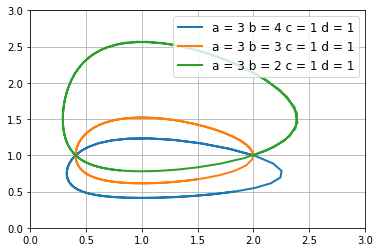

In [22]:
# исходный код, numpy

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def f(y, t, params):
    y1, y2 = y
    a, b, c, d = params
    return [y1 * (a - b * y2), y2 * (-c + d * y1)]
t = np.linspace(0, 7, 71)
y0 = [2, 1]
fig = plt.figure(facecolor = 'white')
for b in range(4, 1, -1):
    params = [3, b, 1, 1]
    st = 'a = %d b = %d c = %d d = %d' % tuple(params)
    [y1, y2] = odeint(f, y0, t, args = (params,), full_output = False).T
    plt.plot(y1, y2, linewidth = 2, label = st)
plt.legend(fontsize = 12)
plt.grid(True)
plt.xlim(0, 3)
plt.ylim(0, 3)

<class 'sage.symbolic.expression.Expression'>

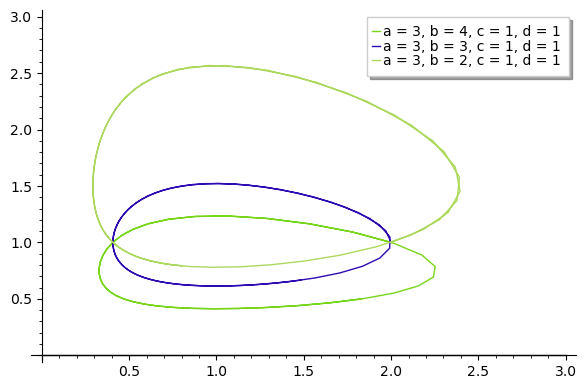

In [21]:
# трансляция исходного кода с использованием SageMath

# приведение переменных к типу "символьное выражение"
var("y1 y2")

# список [0., 0.1, 0.2, ..., 7.]
t = np.linspace(0, 7, 71)
y0 = [2, 1]
# пустой график: оси X, Y
pt = plot(0, 
          xmin = 0, xmax = 3, 
          color = 'black')

a, c, d = 3, 1, 1
for b in range(4, 1, -1):
    # параметры функции
    params = [a, b, c, d]
    f = [y1 * (a - b * y2), 
         y2 * (-c + d * y1)]
    
    # численное решение системы ДУ первого порядка
    sol = desolve_odeint(f, y0, t, dvars = [y1, y2])
    
    # для легенды
    st = 'a = %d, b = %d, c = %d, d = %d' % tuple(params)
    pt += line(sol, rgbcolor = (randint(0, 256) / 256, randint(0, 256) / 256, randint(0, 256) / 256), legend_label=st)

pt.show(xmin = 0, xmax = 3, ymin = 0, ymax = 3)

### Задание 2. 

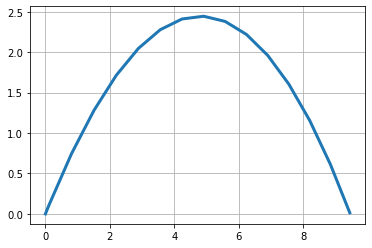

In [23]:
# исходный код, scipy

from scipy.integrate import ode

ts = [ ]
ys = [ ]

def fout(t, y): # обработчик шага
    ts.append(t)
    ys.append(list(y.copy()))

def f(t, y): # функция правой части системы ОДУ
    k = 0.01
    g = 9.81
    y1, y2, y3, y4 = y
    return [y2, -k * y2 * sqrt(y2**2 + y4**2), y4, -k * y4 * sqrt(y2**2 + y4**2) - g]

tmax = 1.41 # время движения, подбирается экспериментально
alph = np.pi / 4 # угол бросания тела
v0 = 10.0 # начальная скорость
ODE = ode(f)
y0, t0 = [0, v0 * np.cos(alph), 0, v0 * np.sin(alph)], 0 # начальные условия

r = ODE.set_integrator('dopri5', max_step = 0.1) # метод Рунге – Кутта
r.set_solout(fout) # загрузка обработчика шага
r = ODE.set_initial_value(y0, t0) # задание начальных значений
ret = r.integrate(tmax) # решаем ОДУ

Y = np.array(ys)

fig, ax = plt.subplots()
fig.set_facecolor('white')
ax.plot(Y[:, 0], Y[:, 2], linewidth = 3) # график решения
ax.grid(True)

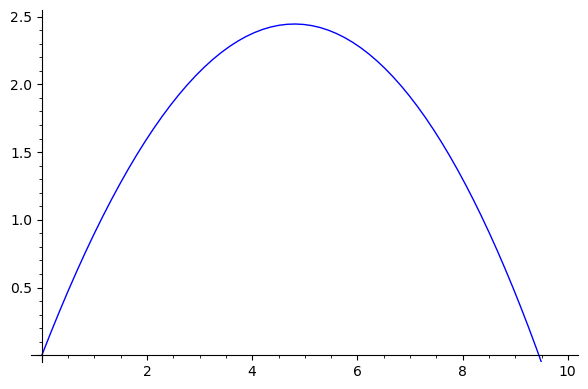

In [28]:
# трансляция исходного кода с использованием SageMath

# sage symbolic expression
var("y1 y2 y3 y4")

# время движения тела
tmax = 1.41
# угол бросания тела
alph = np.pi / 4
# начальная скорость
v0 = 10.0
# начальное состояние
t0 = 0
y0 = [0, v0 * np.cos(alph), 0, v0 * np.sin(alph)]
# временные промежутки
t = np.linspace(0, 7, 300)
# константы
k = 0.01
g = 9.81
# функция правой части системы ОДУ
f = [y2, -k * y2 * sqrt(y2**2 + y4**2), y4, -k * y4 * sqrt(y2**2 + y4**2) - g]
# решение ОДУ
sol = desolve_odeint(f, y0, t, dvars = [y1, y2, y3, y4])
# график
Y = np.array(sol)
arr = zip(Y[:, 0], Y[:, 2])
line(arr).show(xmin = 0, xmax = 10, ymin = 0, ymax = 2.5)